In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset = pd.read_csv('HealthData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 13].values

In [3]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(X[:, 11:13])
X[:, 11:13] = imputer.transform(X[:, 11:13])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
import joblib
joblib.dump(sc, 'standard_scaler_ts025.pkl')

['standard_scaler_ts025.pkl']

num
0    164
1    139
Name: count, dtype: int64

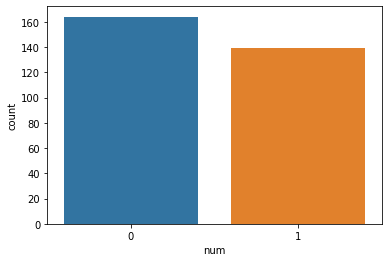

In [7]:
import seaborn as sn
sn.countplot(x='num',data=dataset)
dataset.num.value_counts()

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

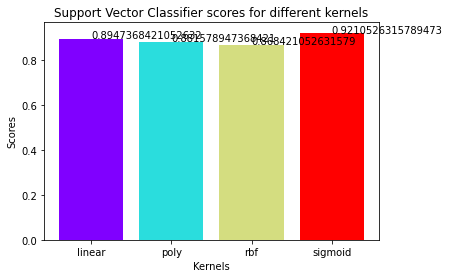

In [8]:
from sklearn.svm import SVC
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, Y_train)
    svc_scores.append(svc_classifier.score(X_test, Y_test))

from matplotlib.cm import rainbow

colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')


In [9]:
classifier = SVC(kernel = 'rbf', random_state = 0 ,probability=True)
classifier.fit(X_train, Y_train)

SVC(probability=True, random_state=0)

In [10]:
filename = 'svc_model.pkl'
joblib.dump(classifier,filename)

['svc_model.pkl']

In [11]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.868421052631579

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.86      0.86      0.86        35

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



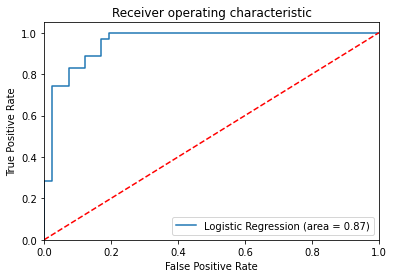

In [14]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [15]:
Newdataset = pd.read_csv('newdata.csv')
ynew = classifier.predict(Newdataset)

C:\Users\edume\anaconda3\envs\heart_ml\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
